# PANDAS

In [134]:

# We start by bringing in our data processing libraries.

import pandas as pd
import numpy as np
# We'll bring in some timing functionality too, from the timeit module
import timeit

# Looking at some census data from the US
df = pd.read_csv("C:\\Users\\Amaka\\Desktop\\DS FILES\\census.csv")
df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243286,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861


In [135]:
# Below is the Pandorable way to write code with mtd chaining
# In this code we pull out the state and city names as a multiple index, and we do so pnly for data which a summary level of 50
# which in thid dataset is county level data. we rename a column too , just to make more readable.

(df.where(df['SUMLEV']==50)
 .dropna()
 .set_index(['STNAME','CTYNAME'])
 .rename(columns={'ESTIMATESBASE2010':'Estimates Base 2010'}))

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME  CTYNAME                                                      
Alabama Autauga County       50.0     3.0       6.0    1.0     1.0   
        Baldwin County       50.0     3.0       6.0    1.0     3.0   
        Barbour County       50.0     3.0       6.0    1.0     5.0   
        Bibb County          50.0     3.0       6.0    1.0     7.0   
        Blount County        50.0     3.0       6.0    1.0     9.0   
...                           ...     ...       ...    ...     ...   
Wyoming Sweetwater County    50.0     4.0       8.0   56.0    37.0   
        Teton County         50.0     4.0       8.0   56.0    39.0   
        Uinta County         50.0     4.0       8.0   56.0    41.0   
        Washakie County      50.0     4.0       8.0   56.0    43.0   
        Weston County        50.0     4.0       8.0   56.0    45.0   

                           CENSUS2010POP  Estimates Base 2010  \
STNAME  CTYNAME                                                 
Alabama Autauga County           54571.0              54571.0   
        Baldwin County          182265.0             182265.0   
        Barbour County           27457.0              27457.0   
        Bibb County              22915.0              22919.0   
        Blount County            57322.0              57322.0   
...                                  ...                  ...   
Wyoming Sweetwater County        43806.0              43806.0   
        Teton County             21294.0              21294.0   
        Uinta County             21118.0              21118.0   
        Washakie County           8533.0               8533.0   
        Weston County             7208.0               7208.0   

                           POPESTIMATE2010  POPESTIMATE2011  POPESTIMATE2012  \
STNAME  CTYNAME                                                                
Alabama Autauga County             54660.0          55253.0          55175.0   
        Baldwin County            183193.0         186659.0         190396.0   
        Barbour County             27341.0          27226.0          27159.0   
        Bibb County                22861.0          22733.0          22642.0   
        Blount County              57373.0          57711.0          57776.0   
...                                    ...              ...              ...   
Wyoming Sweetwater County          43593.0          44041.0          45104.0   
        Teton County               21297.0          21482.0          21697.0   
        Uinta County               21102.0          20912.0          20989.0   
        Washakie County             8545.0           8469.0           8443.0   
        Weston County               7181.0           7114.0           7065.0   

                           ...  RDOMESTICMIG2011  RDOMESTICMIG2012  \
STNAME  CTYNAME            ...                                       
Alabama Autauga County     ...          7.242091         -2.915927   
        Baldwin County     ...         14.832960         17.647293   
        Barbour County     ...         -4.728132         -2.500690   
        Bibb County        ...         -5.527043         -5.068871   
        Blount County      ...          1.807375         -1.177622   
...                        ...               ...               ...   
Wyoming Sweetwater County  ...          1.072643         16.243199   
        Teton County       ...         -1.589565          0.972695   
        Uinta County       ...        -17.755986         -4.916350   
        Washakie County    ...        -11.637475         -0.827815   
        Weston County      ...        -11.752361         -8.040059   

                           RDOMESTICMIG2013  RDOMESTICMIG2014  \
STNAME  CTYNAME                                                 
Alabama Autauga County            -3.012349          2.265971   
        Baldwin County            21.845705         19.243286   
        Barbour County            -7.056824         -3.904

In [136]:

# We use the where()function on the dataframe and pass in a boolean mask which
# is only true for those rows where the SUMLEV is equal to 50. This indicates in our source data that the data is summerised at the county level
# with the result of the where() function evaluated, we drop the missing values. Remember that where doesn't dump missing value by default. We set an index
# on the result with State name,and county name. Finally, we rename a column to make it more readable.
# Instead of writing on one line, we begin the stmt with a parenthesis to tell Python we are spanning the stmt over multiple lines for readability.

# Using the traditional non Pandorable way,
# First create a new dataframe from the original

df = df[df['SUMLEV']==50]
df.set_index(['STNAME','CTYNAME'], inplace=True)
df.rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'})

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME  CTYNAME                                                      
Alabama Autauga County         50       3         6      1       1   
        Baldwin County         50       3         6      1       3   
        Barbour County         50       3         6      1       5   
        Bibb County            50       3         6      1       7   
        Blount County          50       3         6      1       9   
...                           ...     ...       ...    ...     ...   
Wyoming Sweetwater County      50       4         8     56      37   
        Teton County           50       4         8     56      39   
        Uinta County           50       4         8     56      41   
        Washakie County        50       4         8     56      43   
        Weston County          50       4         8     56      45   

                           CENSUS2010POP  Estimates Base 2010  \
STNAME  CTYNAME                                                 
Alabama Autauga County             54571                54571   
        Baldwin County            182265               182265   
        Barbour County             27457                27457   
        Bibb County                22915                22919   
        Blount County              57322                57322   
...                                  ...                  ...   
Wyoming Sweetwater County          43806                43806   
        Teton County               21294                21294   
        Uinta County               21118                21118   
        Washakie County             8533                 8533   
        Weston County               7208                 7208   

                           POPESTIMATE2010  POPESTIMATE2011  POPESTIMATE2012  \
STNAME  CTYNAME                                                                
Alabama Autauga County               54660            55253            55175   
        Baldwin County              183193           186659           190396   
        Barbour County               27341            27226            27159   
        Bibb County                  22861            22733            22642   
        Blount County                57373            57711            57776   
...                                    ...              ...              ...   
Wyoming Sweetwater County            43593            44041            45104   
        Teton County                 21297            21482            21697   
        Uinta County                 21102            20912            20989   
        Washakie County               8545             8469             8443   
        Weston County                 7181             7114             7065   

                           ...  RDOMESTICMIG2011  RDOMESTICMIG2012  \
STNAME  CTYNAME            ...                                       
Alabama Autauga County     ...          7.242091         -2.915927   
        Baldwin County     ...         14.832960         17.647293   
        Barbour County     ...         -4.728132         -2.500690   
        Bibb County        ...         -5.527043         -5.068871   
        Blount County      ...          1.807375         -1.177622   
...                        ...               ...               ...   
Wyoming Sweetwater County  ...          1.072643         16.243199   
        Teton County       ...         -1.589565          0.972695   
        Uinta County       ...        -17.755986         -4.916350   
        Washakie County    ...        -11.637475         -0.827815   
        Weston County      ...        -11.752361         -8.040059   

                           RDOMESTICMIG2013  RDOMESTICMIG2014  \
STNAME  CTYNAME                                                 
Alabama Autauga County            -3.012349          2.265971   
        Baldwin County            21.845705         19.243286   
        Barbour County            -7.056824         -3.904

In [137]:
# The key with any good idiom is to understand when it's not helping you. In this case, you can time 
# both methods and see which one runs faster. We can put the approach into a function and pass it into the timeit function to count the time the
# the parameter number allows us to choose how many times we want to run the function.Let's set it to 10.

# Let's write a wrapper for our first function

def first_approach():
    global df
    return (df.where(df['SUMLEV']==50)
                     .dropna()
                     .set_index(['STNAME','CTYNAME'])
                     .rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'}))
df = pd.read_csv("C:\\Users\\Amaka\\Desktop\\DS FILES\\census.csv")
timeit.timeit(first_approach,number=10)

1.5007049000000023

In [138]:
def second_approach():
    global df
    new_df = df[df['SUMLEV']==50]
    new_df.set_index(['STNAME','CTYNAME'], inplace=True)
    return new_df.rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'})
df = pd.read_csv("C:\\Users\\Amaka\\Desktop\\DS FILES\\census.csv")
timeit.timeit(second_approach,number=10)

0.28157229999999345

In [139]:
def min_max(row):
    data = row[['POPESTIMATE2010',
                'POPESTIMATE2011',
                'POPESTIMATE2012',
                'POPESTIMATE2013',
                'POPESTIMATE2014',
                'POPESTIMATE2015']]
    return pd.Series({'min': np.min(data), 'max': np.max(data)})
df.apply(min_max, axis='columns').head()

,min,max
0,4785161,4858979
1,54660,55347
2,183193,203709
3,26489,27341
4,22512,22861


In [140]:
def min_max(row):
    data = row[['POPESTIMATE2010',
                'POPESTIMATE2011',
                'POPESTIMATE2012',
                'POPESTIMATE2013',
                'POPESTIMATE2014',
                'POPESTIMATE2015']]
    row['max'] = np.max(data)
    row['min'] = np.min(data)
    return row
df.apply(min_max, axis='columns')

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,max,min
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594,4858979,4785161
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333,55347,54660
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,21.845705,19.243286,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499,203709,183193
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299,27341,26489
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861,22861,22512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,50,4,8,56,37,Wyoming,Sweetwater County,43806,43806,43593,...,-5.339774,-14.252889,-14.248864,1.255221,16.243199,-5.295460,-14.075283,-14.070195,45162,43593
3189,50,4,8,56,39,Wyoming,Teton County,21294,21294,21297,...,19.525929,14.143021,-0.564849,0.654527,2.408578,21.160658,16.308671,1.520747,23125,21297
3190,50,4,8,56,41,Wyoming,Uinta County,21118,21118,21102,...,-6.902954,-14.215862,-12.127022,-18.136812,-5.536861,-7.521840,-14.740608,-12.606351,21102,20822
3191,50,4,8,56,43,Wyoming,Washakie County,8533,8533,8545,...,-2.013502,-17.781491,1.682288,-11.990126,-1.182592,-2.250385,-18.020168,1.441961,8545,8316


In [141]:

rows = ['POPESTIMATE2010', 'POPESTIMATE2011','POPESTIMATE2012','POPESTIMATE2013', 'POPESTIMATE2014', 'POPESTIMATE2015']
df.apply(lambda x: np.max(x[rows]), axis=1).head()

0    4858979
1      55347
2     203709
3      27341
4      22861
dtype: int64

In [142]:
def get_state_region(x):
    
    northeast = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 
                 'Vermont', 'New York', 'New Jersey', 'Pennsylvania']
    midwest = ['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Winsconsin', 'Iowa', 'Kansas',
               'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota']
    south = ['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 
             'Virginia', 'District of Columbia', 'West Virginia', 'Alabama', 'Kenturkey', 'Mississipi',
             'Tenessee', 'Arkansas', 'Louisiana', 'Oklahoma', 'Texas']
    west = ['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming', 'Alaska',
            'California', 'Hawaii', 'Oregon', 'Washington']
    
    if x in northeast:
        return "Northeast"
    elif x in midwest:
        return "Midwest"
    elif x in south:
        return "South"
    else:
        return "West"
    
    
    
        

In [143]:
df['state_region'] = df['STNAME'].apply(lambda x: get_state_region(x))
df[['STNAME','state_region']].head()

,STNAME,state_region
0,Alabama,South
1,Alabama,South
2,Alabama,South
3,Alabama,South
4,Alabama,South


In [144]:
# Introduction to Pandas

import pandas as np
import numpy as np

In [145]:
# Pandas Series

# We'll start by analysing the G7 Population with Pandas.series object

In [146]:
# In Millions
g7_pop = pd.Series([35.467, 63.951, 80.940, 60.665, 127.061, 64.511, 318.523])
g7_pop

0     35.467
1     63.951
2     80.940
3     60.665
4    127.061
5     64.511
6    318.523
dtype: float64

In [147]:

    g7_pop.name = '97 Population in millions'
    g7_pop

0     35.467
1     63.951
2     80.940
3     60.665
4    127.061
5     64.511
6    318.523
Name: 97 Population in millions, dtype: float64

In [148]:
g7_pop

0     35.467
1     63.951
2     80.940
3     60.665
4    127.061
5     64.511
6    318.523
Name: 97 Population in millions, dtype: float64

In [149]:
# Series are similar to Numpy Arrays

In [150]:
g7_pop.dtype

dtype('float64')

In [151]:
g7_pop.values

array([ 35.467,  63.951,  80.94 ,  60.665, 127.061,  64.511, 318.523])

In [152]:
# They are actually backed by Numpy Arrays

In [153]:
type(g7_pop.values)

numpy.ndarray

In [154]:
# And they look like Python lists or Numpy Arrays, But they're actually more similar to Python 
# dictionaries.
# A series has an index, that's similar to the automatic index assigned to Python's lists.

In [155]:
g7_pop[0]

35.467

In [156]:
g7_pop[1]

63.951

In [157]:
g7_pop.index

RangeIndex(start=0, stop=7, step=1)

In [158]:
l = ['a','b','c']

In [159]:
# But in contrast to lists, we can explicitly define the index

In [160]:
g7_pop.index = ['Canada','France','Germany','Italy','Japan','United Kingdom','United States']
    

In [161]:
g7_pop

Canada             35.467
France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     318.523
Name: 97 Population in millions, dtype: float64

In [162]:
# We can say that series look like 'ordered dictionaries, we can actually create
# series out of dictionaries

In [163]:
pd.Series({
     'Canada': 35.467,
    'France': 63.951,
    'Germany': 80.940,
    'Italy': 60.665,
    'Japan': 127.061,
    'United Kingdom': 64.511,
    'United States': 318.523
}, name='G7 Population in millions')


Canada             35.467
France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     318.523
Name: G7 Population in millions, dtype: float64

In [164]:
pd.Series([35.467, 63.951, 80.940, 60.665, 127.061, 64.511, 318.523],
          index=['Canada','France','Germany','Italy','Japan','United Kingdom','United States'],
          name='97 Population in millions')

Canada             35.467
France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     318.523
Name: 97 Population in millions, dtype: float64

In [165]:
# You can also create series out of other series, specifying indexes.

In [166]:
pd.Series(g7_pop, index=['France', 'Germany', 'Italy', 'Spain',])

France     63.951
Germany    80.940
Italy      60.665
Spain         NaN
Name: 97 Population in millions, dtype: float64

In [167]:
# INDEXING

In [168]:
# Indexing works similarly to Lists and dictionaries, You use the index of the elements you're looking for

In [169]:
g7_pop['Canada']

35.467

In [170]:
g7_pop['Germany']

80.94

In [171]:
# Numeric Positions can also be used, with iloc attribute:

In [172]:
g7_pop.iloc[0]

35.467

In [173]:
g7_pop.iloc[-1]

318.523

In [174]:
# Selecting multiple elements at once

In [175]:
g7_pop[['Italy', 'France']]

Italy     60.665
France    63.951
Name: 97 Population in millions, dtype: float64

In [176]:
g7_pop.iloc[[0, 1]]

Canada    35.467
France    63.951
Name: 97 Population in millions, dtype: float64

In [177]:
# Slicing also works, but is important, in Pandas, the upper limit is also included:

In [178]:
g7_pop['Canada': 'Italy']

Canada     35.467
France     63.951
Germany    80.940
Italy      60.665
Name: 97 Population in millions, dtype: float64

In [179]:
# Conditional Selection(Boolean Arrays)

In [180]:
# The same boolean array techniques we saw applied to Numpy arrays can be used for Pandas Series

In [181]:
g7_pop

Canada             35.467
France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     318.523
Name: 97 Population in millions, dtype: float64

In [182]:
g7_pop>70

Canada            False
France            False
Germany            True
Italy             False
Japan              True
United Kingdom    False
United States      True
Name: 97 Population in millions, dtype: bool

In [183]:
g7_pop[g7_pop>70]

Germany           80.940
Japan            127.061
United States    318.523
Name: 97 Population in millions, dtype: float64

In [184]:
g7_pop.mean()

107.30257142857144

In [185]:
g7_pop[g7_pop>g7_pop.mean()]

Japan            127.061
United States    318.523
Name: 97 Population in millions, dtype: float64

In [186]:
g7_pop.std()

97.24996987121581

In [187]:
# ~ Not
# | Or
# & And

In [188]:
g7_pop[(g7_pop>g7_pop.mean()-g7_pop.std()/2)| (g7_pop>g7_pop.mean()+g7_pop.std()/2)]

France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     318.523
Name: 97 Population in millions, dtype: float64

In [189]:
# Operations and Methods

In [190]:
# Series also support vectorised operations and aggregation functions.

In [191]:
g7_pop

Canada             35.467
France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     318.523
Name: 97 Population in millions, dtype: float64

In [192]:
g7_pop * 1_000_000

Canada             35467000.0
France             63951000.0
Germany            80940000.0
Italy              60665000.0
Japan             127061000.0
United Kingdom     64511000.0
United States     318523000.0
Name: 97 Population in millions, dtype: float64

In [193]:
g7_pop.mean()

107.30257142857144

In [194]:
np.log(g7_pop)

Canada            3.568603
France            4.158117
Germany           4.393708
Italy             4.105367
Japan             4.844667
United Kingdom    4.166836
United States     5.763695
Name: 97 Population in millions, dtype: float64

In [195]:
g7_pop['France':'Italy'].mean()

68.51866666666666

In [196]:
# Boolean Arrays
# (work in the same way as Numpy)

In [197]:
g7_pop

Canada             35.467
France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     318.523
Name: 97 Population in millions, dtype: float64

In [198]:
g7_pop > 80

Canada            False
France            False
Germany            True
Italy             False
Japan              True
United Kingdom    False
United States      True
Name: 97 Population in millions, dtype: bool

In [199]:
g7_pop[g7_pop > 80]

Germany           80.940
Japan            127.061
United States    318.523
Name: 97 Population in millions, dtype: float64

In [200]:
g7_pop[(g7_pop > 80) | (g7_pop < 40)]

Canada            35.467
Germany           80.940
Japan            127.061
United States    318.523
Name: 97 Population in millions, dtype: float64

In [201]:
g7_pop[(g7_pop > 80) & (g7_pop < 200)]

Germany     80.940
Japan      127.061
Name: 97 Population in millions, dtype: float64

In [202]:
# Modifying Series

In [203]:
g7_pop['Canada'] = 40.5

In [204]:
g7_pop

Canada             40.500
France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     318.523
Name: 97 Population in millions, dtype: float64

In [205]:
g7_pop.iloc[-1] = 500

In [206]:
g7_pop

Canada             40.500
France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     500.000
Name: 97 Population in millions, dtype: float64

In [207]:
g7_pop[g7_pop < 70]

Canada            40.500
France            63.951
Italy             60.665
United Kingdom    64.511
Name: 97 Population in millions, dtype: float64

In [208]:
g7_pop[g7_pop < 70] = 99.99

In [209]:
g7_pop

Canada             99.990
France             99.990
Germany            80.940
Italy              99.990
Japan             127.061
United Kingdom     99.990
United States     500.000
Name: 97 Population in millions, dtype: float64

In [210]:
# PANDAS - DATA FRAMES

In [211]:
# The most important data structures of Pandas is probably the Data Frames. It is a tabular structure 
# tightly integrated with Series.

In [212]:
# Hands On

import numpy as np
import pandas as np

In [213]:
# We'll keep our analysis of G7 Coutries.Dataframes look a lot like tables.
# You can create data from a database, a csv file, or from the web.But you can still create a dataframe by specifying colums and values


In [214]:
df = pd.DataFrame({
    'Population': [35.467, 63.951, 80.940, 60.665, 127.061, 64.511, 318.523],
    'GDP': [1785387, 2833687, 3874437, 2167744,4602367,2950039,17348075],
    'Surface Area': [9984670,640679,357114, 301336,377930, 242495, 9525067],
    'HDI': [0.913, 0.888, 0.916, 0.873, 0.891, 0.907, 0.915],
    'Continent': ['America', 'Europe', 'Europe', 'Europe', 'Asia', 'Europe', 'America']
    }, columns = ['Population', 'GDP', 'Surface Area', 'HDI', 'Continent'])
# The columns attribute is optional.

In [215]:
df

,Population,GDP,Surface Area,HDI,Continent
0,35.467,1785387,9984670,0.913,America
1,63.951,2833687,640679,0.888,Europe
2,80.940,3874437,357114,0.916,Europe
3,60.665,2167744,301336,0.873,Europe
4,127.061,4602367,377930,0.891,Asia
5,64.511,2950039,242495,0.907,Europe
6,318.523,17348075,9525067,0.915,America


In [216]:
# DataFrames also have indexes as we see auto incrementally assigned above by Panda in each row.
# We know in our case that each row represent a country. Let's assign the countries as index.

In [217]:
df.index = ['Canada', 'France', 'Germany', 'Italy', 'Japan', 'United Kingdom', 'United States']

In [218]:
df

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [219]:
df.columns

Index(['Population', 'GDP', 'Surface Area', 'HDI', 'Continent'], dtype='object')

In [220]:
df.index

Index(['Canada', 'France', 'Germany', 'Italy', 'Japan', 'United Kingdom',
       'United States'],
      dtype='object')

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, Canada to United States
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Population    7 non-null      float64
 1   GDP           7 non-null      int64  
 2   Surface Area  7 non-null      int64  
 3   HDI           7 non-null      float64
 4   Continent     7 non-null      object 
dtypes: float64(2), int64(2), object(1)
memory usage: 336.0+ bytes


In [222]:
df.size

35

In [223]:
df.shape

(7, 5)

In [224]:
df.describe()

,Population,GDP,Surface Area,HDI
count,7.000000,7.000000e+00,7.000000e+00,7.000000
mean,107.302571,5.080248e+06,3.061327e+06,0.900429
std,97.249970,5.494020e+06,4.576187e+06,0.016592
min,35.467000,1.785387e+06,2.424950e+05,0.873000
25%,62.308000,2.500716e+06,3.292250e+05,0.889500
50%,64.511000,2.950039e+06,3.779300e+05,0.907000
75%,104.000500,4.238402e+06,5.082873e+06,0.914000
max,318.523000,1.734808e+07,9.984670e+06,0.916000


In [225]:
df.dtypes

Population      float64
GDP               int64
Surface Area      int64
HDI             float64
Continent        object
dtype: object

In [226]:
df.dtypes.value_counts()

float64    2
int64      2
object     1
dtype: int64

In [227]:
# Indexing, Selection, and slicing

In [228]:
# Individual columns in the DataFrame can be selected with regular indexing. Each column is represented as a Series

In [229]:
df['Population']

Canada             35.467
France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     318.523
Name: Population, dtype: float64

In [230]:
# The index of the returned series is the same as the Dataframe one. And its name is the name of the column
# To_frame method gives a dataframe-like format.

In [231]:
df['Population'].to_frame()

,Population
Canada,35.467
France,63.951
Germany,80.940
Italy,60.665
Japan,127.061
United Kingdom,64.511
United States,318.523


In [232]:
# Multiple columns can also be selected similarly to Numpy and Series

In [233]:
df[['Population', 'GDP']]

,Population,GDP
Canada,35.467,1785387
France,63.951,2833687
Germany,80.940,3874437
Italy,60.665,2167744
Japan,127.061,4602367
United Kingdom,64.511,2950039
United States,318.523,17348075


In [234]:
# In this case, the result is another dataframe. Slicing works differently, it acts at row level.
# and can be counter intuitive

In [235]:
df[1:3]

,Population,GDP,Surface Area,HDI,Continent
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe


In [236]:
# Row level selection work better with loc and iloc, which are recommended over regular'direct slicing'[:]).

In [237]:
# loc selects rows matching the given index:

In [238]:
df.loc['Italy']

Population       60.665
GDP             2167744
Surface Area     301336
HDI               0.873
Continent        Europe
Name: Italy, dtype: object

In [239]:
df.loc['France': 'Italy']

,Population,GDP,Surface Area,HDI,Continent
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe


In [240]:
# As a second 'argument', you can pass the column(s) you'd like to select:

In [241]:
df.loc['France': 'Italy', 'Population']

France     63.951
Germany    80.940
Italy      60.665
Name: Population, dtype: float64

In [242]:
df.loc['France': 'Italy', ['Population', 'GDP']]

,Population,GDP
France,63.951,2833687
Germany,80.940,3874437
Italy,60.665,2167744


In [243]:
# iloc works with the (numeric) 'position' of the index

In [244]:
df

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [245]:
df.iloc[0]

Population       35.467
GDP             1785387
Surface Area    9984670
HDI               0.913
Continent       America
Name: Canada, dtype: object

In [246]:
df.iloc[-1]

Population       318.523
GDP             17348075
Surface Area     9525067
HDI                0.915
Continent        America
Name: United States, dtype: object

In [247]:
df.iloc[[0, 1, -1]]

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
United States,318.523,17348075,9525067,0.915,America


In [248]:
df.iloc[1:3]

,Population,GDP,Surface Area,HDI,Continent
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe


In [249]:
df.iloc[1:3,3]

France     0.888
Germany    0.916
Name: HDI, dtype: float64

In [250]:
df.iloc[1:3, [0,3]]

,Population,HDI
France,63.951,0.888
Germany,80.940,0.916


In [251]:
df.iloc[1:3, 1:3]

,GDP,Surface Area
France,2833687,640679
Germany,3874437,357114


In [252]:
# Always use loc and iloc to reduce ambiguity especialy with Dataframes with numeric indexes.

In [253]:
# Conditional Selection (Boolean Array)

# We saw conditional selection apply to Series, and it'll work in the same way for Dataframes.
# Afterall a Dataframe is a collection of Series.

In [254]:
df

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [255]:
df['Population'] > 70

Canada            False
France            False
Germany            True
Italy             False
Japan              True
United Kingdom    False
United States      True
Name: Population, dtype: bool

In [256]:
df.loc[df['Population'] > 70]

,Population,GDP,Surface Area,HDI,Continent
Germany,80.940,3874437,357114,0.916,Europe
Japan,127.061,4602367,377930,0.891,Asia
United States,318.523,17348075,9525067,0.915,America


In [257]:
# The Boolean matching is done at index level,so you can filter by any row,
# as long as it contains the right indexes, column selection still works as expected:

In [258]:
# Pandas Conditional Selection and Modifying DataFrames.

In [259]:
df.loc[df['Population'] > 70, 'Population']

Germany           80.940
Japan            127.061
United States    318.523
Name: Population, dtype: float64

In [260]:
df.loc[df['Population'] > 70, ['Population', 'GDP']]

,Population,GDP
Germany,80.940,3874437
Japan,127.061,4602367
United States,318.523,17348075


In [261]:
# Dropping Stuff

In [262]:
# Opposed to the concept of selection, we have dropping, Instead of pointing out which values 
# you'd like to select,you could point which ones you'd like to drop

In [263]:
df.drop('Canada')

,Population,GDP,Surface Area,HDI,Continent
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [264]:
df.drop[('Canada', 'Japan')]

TypeError: 'method' object is not subscriptable

In [265]:
df.drop(column=['Population', 'HDI'])

TypeError: drop() got an unexpected keyword argument 'column'

In [266]:
df.drop(['Italy', 'Canada'], axis=0)

,Population,GDP,Surface Area,HDI,Continent
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [267]:
df.drop(['Population', 'HDI'], axis=1)

,GDP,Surface Area,Continent
Canada,1785387,9984670,America
France,2833687,640679,Europe
Germany,3874437,357114,Europe
Italy,2167744,301336,Europe
Japan,4602367,377930,Asia
United Kingdom,2950039,242495,Europe
United States,17348075,9525067,America


In [268]:
df.drop(['Population', 'HDI'], axis='columns')

,GDP,Surface Area,Continent
Canada,1785387,9984670,America
France,2833687,640679,Europe
Germany,3874437,357114,Europe
Italy,2167744,301336,Europe
Japan,4602367,377930,Asia
United Kingdom,2950039,242495,Europe
United States,17348075,9525067,America


In [269]:
df.drop(['Canada', 'Germany'], axis='rows')

,Population,GDP,Surface Area,HDI,Continent
France,63.951,2833687,640679,0.888,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [270]:
# All these drop methods return a new DataFrame. If you'd like to modify  it 'in place',
# you can use the inplace attribute.

### Operations

In [271]:
df[['Population', 'GDP']]

,Population,GDP
Canada,35.467,1785387
France,63.951,2833687
Germany,80.940,3874437
Italy,60.665,2167744
Japan,127.061,4602367
United Kingdom,64.511,2950039
United States,318.523,17348075


In [272]:
df[['Population', 'GDP']] / 100

,Population,GDP
Canada,0.35467,17853.87
France,0.63951,28336.87
Germany,0.80940,38744.37
Italy,0.60665,21677.44
Japan,1.27061,46023.67
United Kingdom,0.64511,29500.39
United States,3.18523,173480.75


In [273]:
 # Operation with Series work at a column level, broadcasting down the rows(which can be counter intuitive)

In [274]:
crisis=pd.Series([-1_000_000, -0.3], index=['GDP', 'HDI'])
crisis

GDP   -1000000.0
HDI         -0.3
dtype: float64

In [275]:
df[['GDP', 'HDI']]

,GDP,HDI
Canada,1785387,0.913
France,2833687,0.888
Germany,3874437,0.916
Italy,2167744,0.873
Japan,4602367,0.891
United Kingdom,2950039,0.907
United States,17348075,0.915


In [276]:
df[['GDP', 'HDI']] + crisis

,GDP,HDI
Canada,785387.0,0.613
France,1833687.0,0.588
Germany,2874437.0,0.616
Italy,1167744.0,0.573
Japan,3602367.0,0.591
United Kingdom,1950039.0,0.607
United States,16348075.0,0.615


### Modifying DataFrames

In [277]:
# It's simple and intuitive. You can add columns or replace values for columns without issues.

**Adding a New Column**

In [278]:
langs = pd.Series(
    ['French', 'German', 'Italian'],
    index=['France', 'Germany', 'Italy'],
    name='Language')

In [279]:
langs

France      French
Germany     German
Italy      Italian
Name: Language, dtype: object

In [280]:
df['Language'] = langs

In [281]:
df

,Population,GDP,Surface Area,HDI,Continent,Language
Canada,35.467,1785387,9984670,0.913,America,NaN
France,63.951,2833687,640679,0.888,Europe,French
Germany,80.940,3874437,357114,0.916,Europe,German
Italy,60.665,2167744,301336,0.873,Europe,Italian
Japan,127.061,4602367,377930,0.891,Asia,NaN
United Kingdom,64.511,2950039,242495,0.907,Europe,NaN
United States,318.523,17348075,9525067,0.915,America,NaN


**Replacing Values Per Column**

In [282]:
df['Language'] = 'English'

In [283]:
df

,Population,GDP,Surface Area,HDI,Continent,Language
Canada,35.467,1785387,9984670,0.913,America,English
France,63.951,2833687,640679,0.888,Europe,English
Germany,80.940,3874437,357114,0.916,Europe,English
Italy,60.665,2167744,301336,0.873,Europe,English
Japan,127.061,4602367,377930,0.891,Asia,English
United Kingdom,64.511,2950039,242495,0.907,Europe,English
United States,318.523,17348075,9525067,0.915,America,English


**Renaming Columns**

In [284]:
df.rename(columns={'HDI': 'Human Development Index', 'Annual Popcorn Consumption': 'APC'},
          index={'United States':'USA',
                 'United Kingdom':'UK',
                 'Argentina':'AR'})
    

,Population,GDP,Surface Area,Human Development Index,Continent,Language
Canada,35.467,1785387,9984670,0.913,America,English
France,63.951,2833687,640679,0.888,Europe,English
Germany,80.940,3874437,357114,0.916,Europe,English
Italy,60.665,2167744,301336,0.873,Europe,English
Japan,127.061,4602367,377930,0.891,Asia,English
UK,64.511,2950039,242495,0.907,Europe,English
USA,318.523,17348075,9525067,0.915,America,English


In [285]:
# Here, HDI was renamed, but the output ignored 'APC' and 'AR' because they are neither part
# of the DataFrame nor assigned to it. 

In [286]:
df

,Population,GDP,Surface Area,HDI,Continent,Language
Canada,35.467,1785387,9984670,0.913,America,English
France,63.951,2833687,640679,0.888,Europe,English
Germany,80.940,3874437,357114,0.916,Europe,English
Italy,60.665,2167744,301336,0.873,Europe,English
Japan,127.061,4602367,377930,0.891,Asia,English
United Kingdom,64.511,2950039,242495,0.907,Europe,English
United States,318.523,17348075,9525067,0.915,America,English


In [287]:
df.rename(index=str.upper)

,Population,GDP,Surface Area,HDI,Continent,Language
CANADA,35.467,1785387,9984670,0.913,America,English
FRANCE,63.951,2833687,640679,0.888,Europe,English
GERMANY,80.940,3874437,357114,0.916,Europe,English
ITALY,60.665,2167744,301336,0.873,Europe,English
JAPAN,127.061,4602367,377930,0.891,Asia,English
UNITED KINGDOM,64.511,2950039,242495,0.907,Europe,English
UNITED STATES,318.523,17348075,9525067,0.915,America,English


In [288]:
df.rename(index=lambda x: x.lower())

,Population,GDP,Surface Area,HDI,Continent,Language
canada,35.467,1785387,9984670,0.913,America,English
france,63.951,2833687,640679,0.888,Europe,English
germany,80.940,3874437,357114,0.916,Europe,English
italy,60.665,2167744,301336,0.873,Europe,English
japan,127.061,4602367,377930,0.891,Asia,English
united kingdom,64.511,2950039,242495,0.907,Europe,English
united states,318.523,17348075,9525067,0.915,America,English


In [289]:
df.rename(index=str.lower)

,Population,GDP,Surface Area,HDI,Continent,Language
canada,35.467,1785387,9984670,0.913,America,English
france,63.951,2833687,640679,0.888,Europe,English
germany,80.940,3874437,357114,0.916,Europe,English
italy,60.665,2167744,301336,0.873,Europe,English
japan,127.061,4602367,377930,0.891,Asia,English
united kingdom,64.511,2950039,242495,0.907,Europe,English
united states,318.523,17348075,9525067,0.915,America,English


**Dropping Columns**

In [290]:
df.drop(columns='Language', inplace=True)

In [291]:
df.append(pd.Series({'Population': 3, 'GDP': 5}, name='China'))

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387.0,9984670.0,0.913,America
France,63.951,2833687.0,640679.0,0.888,Europe
Germany,80.940,3874437.0,357114.0,0.916,Europe
Italy,60.665,2167744.0,301336.0,0.873,Europe
Japan,127.061,4602367.0,377930.0,0.891,Asia
United Kingdom,64.511,2950039.0,242495.0,0.907,Europe
United States,318.523,17348075.0,9525067.0,0.915,America
China,3.000,5.0,NaN,NaN,NaN


In [292]:
# Append returns a new DataFrame:

In [293]:
df

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [294]:
# You can directly set the new index and values to the DataFrame:

In [295]:
df.loc['China'] = pd.Series({'Population':1_400_000_000,'Continent': 'Asia'})

In [296]:
df

,Population,GDP,Surface Area,HDI,Continent
Canada,3.546700e+01,1785387.0,9984670.0,0.913,America
France,6.395100e+01,2833687.0,640679.0,0.888,Europe
Germany,8.094000e+01,3874437.0,357114.0,0.916,Europe
Italy,6.066500e+01,2167744.0,301336.0,0.873,Europe
Japan,1.270610e+02,4602367.0,377930.0,0.891,Asia
United Kingdom,6.451100e+01,2950039.0,242495.0,0.907,Europe
United States,3.185230e+02,17348075.0,9525067.0,0.915,America
China,1.400000e+09,NaN,NaN,NaN,Asia


**We can use drop to remove a row by index**

In [297]:
df.drop('China', inplace=True)

In [298]:
df

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387.0,9984670.0,0.913,America
France,63.951,2833687.0,640679.0,0.888,Europe
Germany,80.940,3874437.0,357114.0,0.916,Europe
Italy,60.665,2167744.0,301336.0,0.873,Europe
Japan,127.061,4602367.0,377930.0,0.891,Asia
United Kingdom,64.511,2950039.0,242495.0,0.907,Europe
United States,318.523,17348075.0,9525067.0,0.915,America


**More Radical Index Changes**

In [299]:
df.reset_index()

,index,Population,GDP,Surface Area,HDI,Continent
0,Canada,35.467,1785387.0,9984670.0,0.913,America
1,France,63.951,2833687.0,640679.0,0.888,Europe
2,Germany,80.940,3874437.0,357114.0,0.916,Europe
3,Italy,60.665,2167744.0,301336.0,0.873,Europe
4,Japan,127.061,4602367.0,377930.0,0.891,Asia
5,United Kingdom,64.511,2950039.0,242495.0,0.907,Europe
6,United States,318.523,17348075.0,9525067.0,0.915,America


In [300]:
df.set_index('Population')

,GDP,Surface Area,HDI,Continent
Population,,,,
35.467,1785387.0,9984670.0,0.913,America
63.951,2833687.0,640679.0,0.888,Europe
80.940,3874437.0,357114.0,0.916,Europe
60.665,2167744.0,301336.0,0.873,Europe
127.061,4602367.0,377930.0,0.891,Asia
64.511,2950039.0,242495.0,0.907,Europe
318.523,17348075.0,9525067.0,0.915,America


**Creating Columns from Other Columns**

In [301]:
# Altering a Dataframe often involves combining different columns into another. 
# eg from our Countries analysis,we could calculate the 'GDP/Capita' which is GDP/Population

In [302]:
df[['Population', 'GDP']]

,Population,GDP
Canada,35.467,1785387.0
France,63.951,2833687.0
Germany,80.940,3874437.0
Italy,60.665,2167744.0
Japan,127.061,4602367.0
United Kingdom,64.511,2950039.0
United States,318.523,17348075.0


In [303]:
# The regular way of expressing that in Panda is just dividing each Series:

In [304]:
df['GDP'] / df['Population']

Canada            50339.385908
France            44310.284437
Germany           47868.013343
Italy             35733.025633
Japan             36221.712406
United Kingdom    45729.239975
United States     54464.120330
dtype: float64

In [305]:
# The result of that operation is another series you can add to the original Dataframe

In [306]:
df['GDP Per Capita'] = df['GDP'] / df['Population']

In [307]:
df

,Population,GDP,Surface Area,HDI,Continent,GDP Per Capita
Canada,35.467,1785387.0,9984670.0,0.913,America,50339.385908
France,63.951,2833687.0,640679.0,0.888,Europe,44310.284437
Germany,80.940,3874437.0,357114.0,0.916,Europe,47868.013343
Italy,60.665,2167744.0,301336.0,0.873,Europe,35733.025633
Japan,127.061,4602367.0,377930.0,0.891,Asia,36221.712406
United Kingdom,64.511,2950039.0,242495.0,0.907,Europe,45729.239975
United States,318.523,17348075.0,9525067.0,0.915,America,54464.120330


**Statistical Information**

In [308]:
# The describe method gives a good summary of the DataFrame.
# Let's explore other methods in details.

In [309]:
df.head()

,Population,GDP,Surface Area,HDI,Continent,GDP Per Capita
Canada,35.467,1785387.0,9984670.0,0.913,America,50339.385908
France,63.951,2833687.0,640679.0,0.888,Europe,44310.284437
Germany,80.940,3874437.0,357114.0,0.916,Europe,47868.013343
Italy,60.665,2167744.0,301336.0,0.873,Europe,35733.025633
Japan,127.061,4602367.0,377930.0,0.891,Asia,36221.712406


In [310]:
df.describe()

,Population,GDP,Surface Area,HDI,GDP Per Capita
count,7.000000,7.000000e+00,7.000000e+00,7.000000,7.000000
mean,107.302571,5.080248e+06,3.061327e+06,0.900429,44952.254576
std,97.249970,5.494020e+06,4.576187e+06,0.016592,6954.983875
min,35.467000,1.785387e+06,2.424950e+05,0.873000,35733.025633
25%,62.308000,2.500716e+06,3.292250e+05,0.889500,40265.998421
50%,64.511000,2.950039e+06,3.779300e+05,0.907000,45729.239975
75%,104.000500,4.238402e+06,5.082873e+06,0.914000,49103.699626
max,318.523000,1.734808e+07,9.984670e+06,0.916000,54464.120330


In [311]:
Population = df['Population']

In [312]:
Population.min(), Population.max()

(35.467, 318.523)

In [313]:
Population.sum()

751.118

In [314]:
Population.sum() / len(Population)

107.30257142857144

In [315]:
Population.mean()

107.30257142857144

In [316]:
Population.std()

97.24996987121581

In [317]:
Population.median()

64.511

In [318]:
Population.describe()

count      7.000000
mean     107.302571
std       97.249970
min       35.467000
25%       62.308000
50%       64.511000
75%      104.000500
max      318.523000
Name: Population, dtype: float64

In [319]:
Population.quantile(.25)

62.308

In [320]:
Population.quantile([2, 4, 6, 8, 1])

ValueError: percentiles should all be in the interval [0, 1]. Try [0.02 0.04 0.06 0.08 0.01] instead.

**Reading External Data and Plotting**

In [321]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

matplotlib inline

SyntaxError: invalid syntax (Temp/ipykernel_8848/3823265649.py, line 5)

In [322]:
# Pandas can easily read data stored in different file formats like; CSV,JSON,XML, or even Excel.
# Parsing involves specifying the correct structure, encoding and other details.
# The read_CSV method reads CSV files and accepts many parameters.

In [323]:
pd.read_csv

<function pandas.io.parsers.readers.read_csv(filepath_or_buffer: 'FilePathOrBuffer', sep=<no_default>, delimiter=None, header='infer', names=<no_default>, index_col=None, usecols=None, squeeze=False, prefix=<no_default>, mangle_dupe_cols=True, dtype: 'DtypeArg | None' = None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression='infer', thousands=None, decimal: 'str' = '.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, encoding_errors: 'str | None' = 'strict', dialect=None, error_bad_lines=None, warn_bad_lines=None, on_bad_lines=None, delim_whitespace=False, low_memory=True, memory_map=False,

In [324]:
df = pd.read_csv('C:\\Users\\Amaka\\Downloads\\btc-market-price.csv')

In [325]:
df.head()

,2017-04-02 00:00:00,1099.169125
0,2017-04-03 00:00:00,1141.813000
1,2017-04-04 00:00:00,1141.600363
2,2017-04-05 00:00:00,1133.079314
3,2017-04-06 00:00:00,1196.307937
4,2017-04-07 00:00:00,1190.454250


In [326]:
# The csv file we are reading has only 2 columns timestamp and price. It doesn't have a header.
# It ciontains white spaces and have values seperated by commas. Pandas automatically assigned the 
# the 1st row of data as headers, which is incorrect. We can overwrite this behavior with the 
# header parameter:

In [327]:
df = pd.read_csv('C:\\Users\\Amaka\\Downloads\\btc-market-price.csv', header=None)

In [328]:
df.head()

,0,1
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937


In [329]:
# We can explicitly set the name of each column by setting the df.columns attribute

In [330]:
df.columns = ['Timestamp', 'Price']

In [331]:
df.head()

,Timestamp,Price
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937


In [332]:
df.shape()

TypeError: 'tuple' object is not callable

In [333]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  365 non-null    object 
 1   Price      365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [334]:
df.head()

,Timestamp,Price
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937


In [335]:
df.tail(3)

,Timestamp,Price
362,2018-03-30 00:00:00,6882.531667
363,2018-03-31 00:00:00,6935.480000
364,2018-04-01 00:00:00,6794.105000


In [336]:
df.type()

AttributeError: 'DataFrame' object has no attribute 'type'

In [337]:
# We can perform vectorised operation to parse all the timestamp values
# as Datetime objects

In [338]:
pd.to_datetime(df['Timestamp']).head()

0   2017-04-02
1   2017-04-03
2   2017-04-04
3   2017-04-05
4   2017-04-06
Name: Timestamp, dtype: datetime64[ns]

In [339]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [340]:
df.head()

,Timestamp,Price
0,2017-04-02,1099.169125
1,2017-04-03,1141.813000
2,2017-04-04,1141.600363
3,2017-04-05,1133.079314
4,2017-04-06,1196.307937


In [341]:
df.types

AttributeError: 'DataFrame' object has no attribute 'types'

In [342]:
# The timestamp looks like the index of this DataFrame: date>price.
# We can change the autoincremental ID generated by Pandas and use the 
# Timestamp DS column as the index.

In [343]:
df.set_index('Timestamp', inplace=True)

In [344]:
df.head()

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937


In [345]:
df.loc['2017-09-29']

Price    4193.574667
Name: 2017-09-29 00:00:00, dtype: float64

**Putting Everything Together**

In [346]:
# If we want th run these commands at a certain time everyday, we do this;

In [347]:
df = pd.read_csv('C:\\Users\\Amaka\\Downloads\\btc-market-price.csv')
df.columns = ['Timestamp', 'Price']
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

In [348]:
df.head()

,Price
Timestamp,
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937
2017-04-07,1190.454250


In [349]:
# There should be a better way. The read csv function is powerful and you can specify
# many more parameters at import time, we can achieve the same result with only one line

In [350]:
df = pd.read_csv('C:\\Users\\Amaka\\Downloads\\btc-market-price.csv',
                 header=None,
                 names=['Timestamp', 'price'],
                 index_col=0,
                 parse_dates=True)

In [351]:
df.head()

,price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937


In [352]:
df.loc['2017-09-29']

price    4193.574667
Name: 2017-09-29 00:00:00, dtype: float64

**Plotting Basics**

In [353]:
# Pandas integrates with matplotlib and creating a plot is as simple as;

In [354]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Timestamp'>

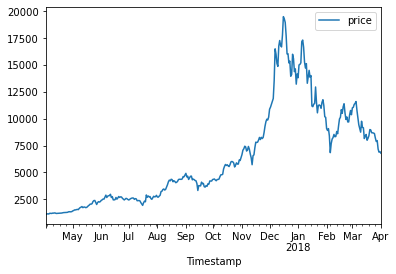

In [355]:
df.plot()

In [356]:
# Behind the scenes, it's using matplotlib.pyplot's interface.
# We can create a similar plot with the plt.plot() function.

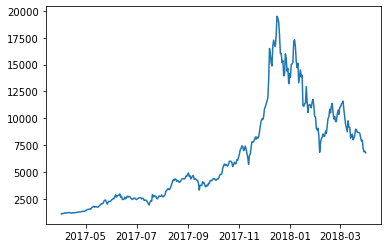

In [357]:
plt.plot(df.index, df['price'])

In [358]:
# plt.plot() accepts many parameters, but the 1st 2 ones are the most important ones.
# the values for the X and Y axis. eg

In [359]:
x = np.arange(-10, 11)


AttributeError: module 'pandas' has no attribute 'arange'

In [360]:
plt.plot(x,x**2)

NameError: name 'x' is not defined

In [361]:
plt.plot(x,x**2)
plt.plot(x, -1 * (x**2))

NameError: name 'x' is not defined

In [362]:
plt.plot(x,y*(x**2)

SyntaxError: unexpected EOF while parsing (Temp/ipykernel_8848/62855444.py, line 1)

In [363]:
# We are using matplotlib's global API, which is horrible, but it is the most popular one.
# We'll learn later how to use the OOP API which will make our work much easier.

In [364]:
# Each plt function alters the global state. If you want to set settings of your plot
# You can use the plt.figure function. Others like plt.title keep altering the global plot

In [365]:
plt.figure(figsize=(12, 6))

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

In [366]:
plt.plot(x, x**2)

NameError: name 'x' is not defined

In [367]:
plt.plot(x, -1 * ( x**2))

NameError: name 'x' is not defined

Text(0.5, 1.0, 'My Nice Plot')

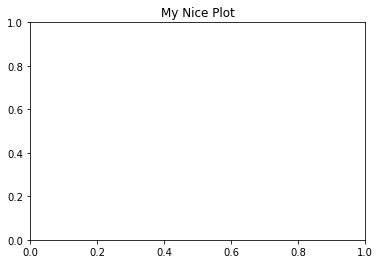

In [368]:
plt.title('My Nice Plot')

In [369]:
# Some of the arguments in plt.figure and plt.plot are available in the Pandas plot interface.

<AxesSubplot:title={'center':'Bitcoin Price 2017-2018'}, xlabel='Timestamp'>

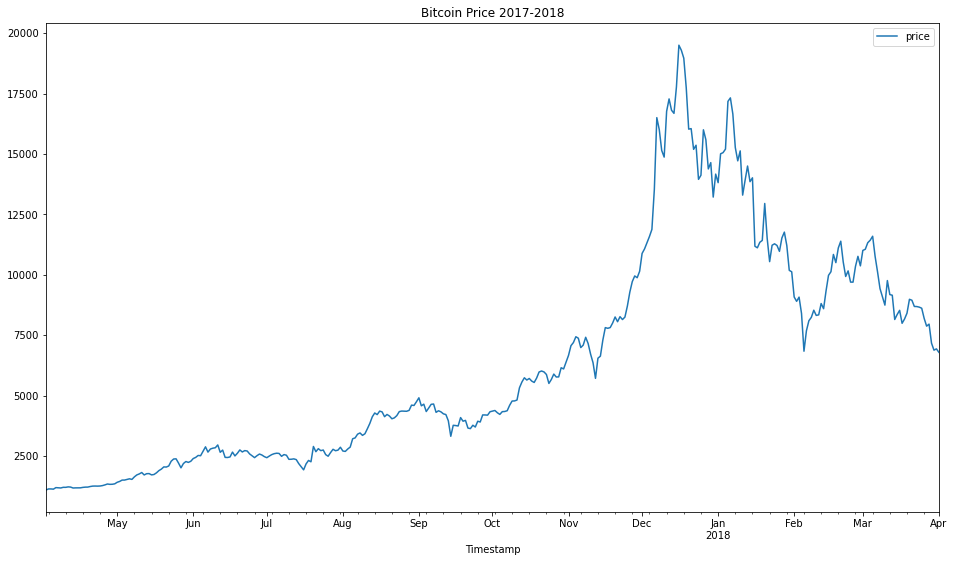

In [370]:
df.plot(figsize=(16, 9), title='Bitcoin Price 2017-2018')

In [371]:
# Pandas integrates with matplotlib and creating a plot is as simple as;

<AxesSubplot:xlabel='Timestamp'>

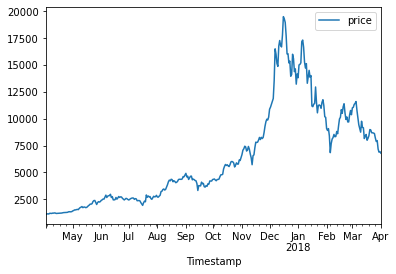

In [372]:
df.plot()

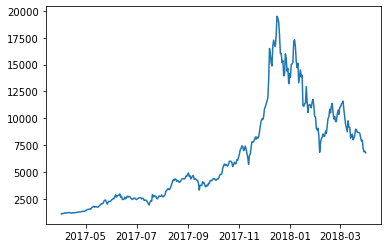

In [373]:
plt.plot(df.index, df['price'])

In [374]:
# plt.plot() accepts many parameters, but the 1st two are the most important.
# the values for X and Y axis.

In [375]:
x = np.arange(-10, 11)

AttributeError: module 'pandas' has no attribute 'arange'

In [ ]:
plt.plot(x, x**2)

**A More Challenging Parsing**

In [376]:
# To demonstrate plotting two columns together, we try to add Ether price to our df DataFrame.
# The ETH prices data can be found in data/eth-price.csv file.The problem is that it seems that the csv file was created
# by someone who hated programmers. Take a look at it and see how ugly it is.
# We will still use pandas to parse it.


In [377]:
eth = pd.read_csv('C:\\Users\\Amaka\\Downloads\\eth-price (5).csv')

In [378]:
eth.head()

,Date(UTC),UnixTimeStamp,Value
0,4/2/2017,1491091200,48.55
1,4/3/2017,1491177600,44.13
2,4/4/2017,1491264000,44.43
3,4/5/2017,1491350400,44.90
4,4/6/2017,1491436800,43.23


In [379]:
# It has a value column(which represents the price) a date(UTC), one that has a string
# representing dates and also a UnixTimeStamp date representing the datetime in Unix timestamp format
# the header is read automatically. Lt's try to parse date with the csv reader:

In [380]:
eth=pd.read_csv('C:\\Users\\Amaka\\Downloads\\btc-market-price.csv', parse_dates=True)

In [381]:
print(eth.dtypes)
eth.head()

2017-04-02 00:00:00     object
1099.169125            float64
dtype: object


,2017-04-02 00:00:00,1099.169125
0,2017-04-03 00:00:00,1141.813000
1,2017-04-04 00:00:00,1141.600363
2,2017-04-05 00:00:00,1133.079314
3,2017-04-06 00:00:00,1196.307937
4,2017-04-07 00:00:00,1190.454250


In [382]:
# Seems the parse_dates attribute didnt work, we'll need to add a little bit more
# more customisation, let's divide this problem and focus on the problem of 'date parsing' 1st.
# The simplest option would be to use the UnixTimeStamp column. The pandas module has a to_datetime
# function that converts Unix timestamps to datetime objects automatically:

In [383]:
pd.to_datetime(eth['UnixTimeStamp']).head()

KeyError: 'UnixTimeStamp'

In [ ]:
# The problem is the precision of Unix timestamp. To match both columns, we'll need to use
# the same index, and our df containing bitcoin prices is 'per day':

In [384]:
df.(head)

SyntaxError: invalid syntax (Temp/ipykernel_8848/2128476482.py, line 1)

In [385]:
# We could either, remove the precision of UnixTimeStamp or attempt to parse the Date(UTC) for fun

In [386]:
pd.to_datetime(eth['Date(UTC)']).head()

KeyError: 'Date(UTC)'

In [387]:
# That seems to work fine: Why isn't it parsing the Date(UTC) column? simple,
# The parse_Dates=True parameter will instruct pandas to parse the index of the
# the index of the DataFrame. If you want to parse any other column, you must explicitly
# parse the column position or name.

In [388]:
pd.read_csv('data/eth-price.csv', parse_dates=[0]).head()

FileNotFoundError: [Errno 2] No such file or directory: 'data/eth-price.csv'

**Putting Everything Together Again**

In [389]:
pd.read_csv('data/eth-price.csv', parse_dates=True, index_col=0)
print(eth.info())

eth.head()

FileNotFoundError: [Errno 2] No such file or directory: 'data/eth-price.csv'

In [390]:
# We can now combine both Dataframes into one, both have the same index
# so alligning both prices will be easy. Let's 1st create an empty Dataframe.
# and with the index from bitcoin prices.

In [391]:
prices = pd.DataFrame(index=df.index)

In [392]:
prices.head()

""
Timestamp
2017-04-02
2017-04-03
2017-04-04
2017-04-05
2017-04-06


In [393]:
# And we can now just set columns from the other DataFrames:

In [394]:
prices['Bitcoin'] = df['Prices']

KeyError: 'Prices'

In [395]:
prices['Ether'] = eth['Value']

KeyError: 'Value'

In [396]:
prices.head()

""
Timestamp
2017-04-02
2017-04-03
2017-04-04
2017-04-05
2017-04-06


In [397]:
# We can now try plotting both values:

In [398]:
prices.plot(figsize=(12, 6))

TypeError: no numeric data to plot

In [399]:
# Seems there's tiny gap btw Dec2017 and Jan2018, Let's zoom in there.

In [400]:
prices.loc['2017-12-01':'2018-01-01'].plot(figsize=(12, 6))

TypeError: no numeric data to plot

In [401]:
# We'll learn how to deal with the missing data later

## Pandas Tutorial

**Pandas is a tool for data processing which helps in Data Analysis; 
It provides functions and methods to efficiently manipulate large Datasets**

In [402]:
# A Dataframe is basically a spreadsheet with rows and columns with index.

In [403]:
# Series is a one-dimensional array with labels.It can contain any Datatype including; integers, strings, floats,
# Python objects and more. It contains index and Data.

In [404]:
# Dataframe is a Two-Dimentional data structure with labels. We can use labels to locate data.
# Column index(df.column)
# Row index(df.index)

In [407]:
import pandas as pd

In [408]:
# Check Pandas version
print(pd._version_)

AttributeError: module 'pandas' has no attribute '_version_'

**Series create, manipulate, query , delete**

In [409]:
# Creating a series from a list

arr = [0, 1, 2, 3, 4]
s1 = pd.Series(arr)
s1

0    0
1    1
2    2
3    3
4    4
dtype: int64

In [410]:
order = [1, 2, 3, 4, 5]
s2 = pd.Series(arr, index=order)
s2

1    0
2    1
3    2
4    3
5    4
dtype: int64

In [435]:
import numpy as np
n=np.random.randn(5) # Create a random ndarray
index = ['a','b','c','d','e']
s2 = pd.Series(n, index=index)
s2

a    1.094456
b   -1.132532
c    0.295772
d    1.538749
e    0.780918
dtype: float64

In [436]:
# Create series from Dictionary
d = {'a':1, 'b':2, 'c':3, 'd':4, 'e':5}
s3 = pd.Series(d)
s3

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [437]:
# You can modify the index of series
print(s1)
s1.index = ['A', 'B', 'C', 'D', 'E']
s1

A    0
B    1
C    2
D    3
E    4
dtype: int64


A    0
B    1
C    2
D    3
E    4
dtype: int64

In [414]:
# Slicing
s1[: -1]

A    0
B    1
C    2
D    3
dtype: int64

In [415]:
# Slicing
s1[:4]


A    0
B    1
C    2
D    3
dtype: int64

In [416]:
s4 = s1.append(s3)
s4

A    0
B    1
C    2
D    3
E    4
a    1
b    2
c    3
d    4
e    5
dtype: int64

In [417]:
s4.drop('e')

A    0
B    1
C    2
D    3
E    4
a    1
b    2
c    3
d    4
dtype: int64

**Series Operation**

In [418]:
arr1=[0, 1, 2, 3, 4, 5, 7]
arr2=[6, 7, 8, 9, 5]

In [419]:
s5=pd.Series(arr2)
s5

0    6
1    7
2    8
3    9
4    5
dtype: int64

In [420]:
s6= pd.Series(arr1)
s6

0    0
1    1
2    2
3    3
4    4
5    5
6    7
dtype: int64

In [421]:
s5.add(s6)

0     6.0
1     8.0
2    10.0
3    12.0
4     9.0
5     NaN
6     NaN
dtype: float64

In [422]:
s5.sub(s6)

0    6.0
1    6.0
2    6.0
3    6.0
4    1.0
5    NaN
6    NaN
dtype: float64

In [423]:
s5.div(s6)

0     inf
1    7.00
2    4.00
3    3.00
4    1.25
5     NaN
6     NaN
dtype: float64

In [424]:
print('median', s6.median())
print('max', s6.max())
print('min', s6.min())

median 3.0
max 7
min 0


In [426]:
s7= pd.Series(arr1)
s7

0    0
1    1
2    2
3    3
4    4
5    5
6    7
dtype: int64

In [427]:
print('median', s7.median())
print('max', s7.max())
print('min', s7.min())

median 3.0
max 7
min 0


**Create a Dataframe**

In [441]:
dates = pd.date_range('today', periods=6)
dates

DatetimeIndex(['2022-05-18 15:45:18.227177', '2022-05-19 15:45:18.227177',
               '2022-05-20 15:45:18.227177', '2022-05-21 15:45:18.227177',
               '2022-05-22 15:45:18.227177', '2022-05-23 15:45:18.227177'],
              dtype='datetime64[ns]', freq='D')

In [442]:
dates = pd.date_range('today', periods=6)
num_arr=np.random.randn(6,4)
num_arr

array([[-0.22479465,  0.49998232, -1.81726511,  0.68809048],
       [ 1.19250956, -0.72066733, -1.12842912, -0.17090622],
       [-1.04931929, -1.56053266,  0.10618512,  0.61504275],
       [ 2.03527522, -1.01033261, -1.07468001, -0.49557169],
       [-1.13923792,  0.72780168, -1.78393052, -0.04511548],
       [-1.64205054, -0.27550445,  0.50756874,  0.80696021]])

In [443]:
dates = pd.date_range('today', periods=6)
num_arr=np.random.randn(6,4)
columns=['A', 'B', 'C', 'D']
columns

['A', 'B', 'C', 'D']

In [446]:
dates = pd.date_range('today', periods=6)
num_arr=np.random.randn(6,4)
columns=['A', 'B', 'C', 'D']

df1 = pd.DataFrame(num_arr, index=dates, columns=columns)
df1

,A,B,C,D
2022-05-18 15:57:05.316425,0.096573,-1.490664,-0.292696,0.133916
2022-05-19 15:57:05.316425,1.679972,-0.805878,0.434700,-0.834946
2022-05-20 15:57:05.316425,0.741850,-0.431648,0.077654,-0.502262
2022-05-21 15:57:05.316425,0.205194,0.546422,1.782270,-0.806728
2022-05-22 15:57:05.316425,0.622315,-1.107730,-1.416592,0.351361
2022-05-23 15:57:05.316425,-0.954930,0.132955,0.386365,-2.588511


In [447]:
# Create DataFrame with dictionary array
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

df2 = pd.DataFrame(data, index=labels)
df2

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


In [448]:
# See datatypes of array
df2.dtypes

animal       object
age         float64
visits        int64
priority     object
dtype: object

In [449]:
df2.head()

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no


In [450]:
df2.head(6)

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no


In [451]:
df2.tail()

,animal,age,visits,priority
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


In [452]:
df2.tail(3)

,animal,age,visits,priority
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


In [454]:
print(df2.index)
df2.columns

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object')


Index(['animal', 'age', 'visits', 'priority'], dtype='object')

In [455]:
df2.values

array([['cat', 2.5, 1, 'yes'],
       ['cat', 3.0, 3, 'yes'],
       ['snake', 0.5, 2, 'no'],
       ['dog', nan, 3, 'yes'],
       ['dog', 5.0, 2, 'no'],
       ['cat', 2.0, 3, 'no'],
       ['snake', 4.5, 1, 'no'],
       ['cat', nan, 1, 'yes'],
       ['dog', 7.0, 2, 'no'],
       ['dog', 3.0, 1, 'no']], dtype=object)

In [456]:
df2.describe() # See statistical data of dataframe

,age,visits
count,8.000000,10.000000
mean,3.437500,1.900000
std,2.007797,0.875595
min,0.500000,1.000000
25%,2.375000,1.000000
50%,3.000000,2.000000
75%,4.625000,2.750000
max,7.000000,3.000000


In [458]:
# To  Transpose the dataframe
df2.T

,a,b,c,d,e,f,g,h,i,j
animal,cat,cat,snake,dog,dog,cat,snake,cat,dog,dog
age,2.5,3.0,0.5,NaN,5.0,2.0,4.5,NaN,7.0,3.0
visits,1,3,2,3,2,3,1,1,2,1
priority,yes,yes,no,yes,no,no,no,yes,no,no


In [459]:
df2.sort_values(by = 'age')

,animal,age,visits,priority
c,snake,0.5,2,no
f,cat,2.0,3,no
a,cat,2.5,1,yes
b,cat,3.0,3,yes
j,dog,3.0,1,no
g,snake,4.5,1,no
e,dog,5.0,2,no
i,dog,7.0,2,no
d,dog,NaN,3,yes
h,cat,NaN,1,yes


In [460]:
df2[1:3]

,animal,age,visits,priority
b,cat,3.0,3,yes
c,snake,0.5,2,no


In [461]:
df2.sort_values(by='age')[1:3]

,animal,age,visits,priority
f,cat,2.0,3,no
a,cat,2.5,1,yes


In [462]:
# Query Dataframe by tag

df2[['age', 'visits']]

,age,visits
a,2.5,1
b,3.0,3
c,0.5,2
d,NaN,3
e,5.0,2
f,2.0,3
g,4.5,1
h,NaN,1
i,7.0,2
j,3.0,1


In [463]:
df2.iloc[1:3] # Query rows2,3

,animal,age,visits,priority
b,cat,3.0,3,yes
c,snake,0.5,2,no


In [464]:
df3 = df2.copy()
df3

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


In [465]:
df3.isnull()

,animal,age,visits,priority
a,False,False,False,False
b,False,False,False,False
c,False,False,False,False
d,False,True,False,False
e,False,False,False,False
f,False,False,False,False
g,False,False,False,False
h,False,True,False,False
i,False,False,False,False
j,False,False,False,False


In [466]:
df3.loc['f', 'age']=1.5
df3

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,1.5,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


In [468]:
df3[['age']].mean()

age    3.375
dtype: float64

In [474]:
df3.mean()

C:\Users\Amaka\AppData\Local\Temp/ipykernel_8848/3891983329.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df3.mean()


age       3.375
visits    1.900
dtype: float64

In [471]:
df3['visits'].min()

1

In [472]:
df3['visits'].max()

3

In [473]:
df3['visits'].sum()

19

In [475]:
df3.sum()

animal      catcatsnakedogdogcatsnakecatdogdog
age                                       27.0
visits                                      19
priority              yesyesnoyesnononoyesnono
dtype: object

In [476]:
string = pd.Series(['A', 'C', 'D', 'Aaa', 'BaCa', np.nan, 'CBA', 'cow', 'owl'])
string

0       A
1       C
2       D
3     Aaa
4    BaCa
5     NaN
6     CBA
7     cow
8     owl
dtype: object

In [477]:
string = pd.Series(['A', 'C', 'D', 'Aaa', 'BaCa', np.nan, 'CBA', 'cow', 'owl'])
string.str.lower()

0       a
1       c
2       d
3     aaa
4    baca
5     NaN
6     cba
7     cow
8     owl
dtype: object

In [478]:
string = pd.Series(['A', 'C', 'D', 'Aaa', 'BaCa', np.nan, 'CBA', 'cow', 'owl'])
string.str.upper()

0       A
1       C
2       D
3     AAA
4    BACA
5     NaN
6     CBA
7     COW
8     OWL
dtype: object

**Operation for Dataframe Missing Values**

In [479]:
df4 = df3.copy()
df4

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,1.5,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


In [480]:
df4 = df3.copy()
df4.fillna(4)

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,4.0,3,yes
e,dog,5.0,2,no
f,cat,1.5,3,no
g,snake,4.5,1,no
h,cat,4.0,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


In [481]:
df4 = df3.copy()
meanAge = df4['age'].mean()
df4['age'].fillna(meanAge)

a    2.500
b    3.000
c    0.500
d    3.375
e    5.000
f    1.500
g    4.500
h    3.375
i    7.000
j    3.000
Name: age, dtype: float64

In [482]:
df5 = df3.copy()
df5.dropna(how='any')

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
e,dog,5.0,2,no
f,cat,1.5,3,no
g,snake,4.5,1,no
i,dog,7.0,2,no
j,dog,3.0,1,no


#Dataframe File Operations

In [ ]:
df3.to_csv('animal.csv')

In [484]:
df_animal=pd.read_csv('animal.csv')
df_animal.head(3)

,Unnamed: 0,animal,age,visits,priority
0,a,cat,2.5,1,yes
1,b,cat,3.0,3,yes
2,c,snake,0.5,2,no


In [487]:
df3.to_excel('animal.xlsx', sheet_name='Sheet1')
df_animal2 = pd.read_excel('animal.xlsx', 'Sheet1', index_col=None, na_values=['NA'])
df_animal2

,Unnamed: 0,animal,age,visits,priority
0,a,cat,2.5,1,yes
1,b,cat,3.0,3,yes
2,c,snake,0.5,2,no
3,d,dog,NaN,3,yes
4,e,dog,5.0,2,no
5,f,cat,1.5,3,no
6,g,snake,4.5,1,no
7,h,cat,NaN,1,yes
8,i,dog,7.0,2,no
9,j,dog,3.0,1,no


**Visualisation in Pandas**

<AxesSubplot:>

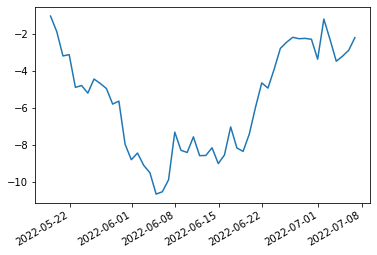

In [492]:
# Series and DataFrame Line Chart

import numpy as np
%matplotlib inline

ts = pd.Series(np.random.randn(50), index=pd.date_range('today', periods=50))
ts = ts.cumsum()
ts.plot()

<AxesSubplot:>

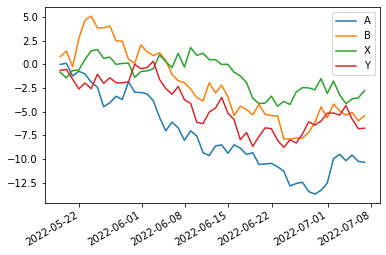

In [494]:
# Doing the whole DataFrame

df = pd.DataFrame(np.random.randn(50, 4), index=ts.index,
                  columns=['A', 'B', 'X', 'Y'])
df = df.cumsum()
df.plot()

**Remove Repeated Data Using Pandas**

In [495]:
df = pd.DataFrame({'A':[1,2,2,2,4,4,5,5,6,6,7,8,8]})
df

,A
0,1
1,2
2,2
3,2
4,4
5,4
6,5
7,5
8,6
9,6


In [497]:
df = pd.DataFrame({'A':[1,2,2,2,4,4,5,5,6,6,7,8,8]}) # To remove, use the Location function or shift function
df.loc[df['A'].shift() != df['A']] # Shift data by 1 and print if it's not equal to original Dataframe

,A
0,1
1,2
4,4
6,5
8,6
10,7
11,8
